In [ ]:
## brian_script_env (R kernel)

In [1]:
library(tidyverse)
library(ggplot2)
library(ComplexHeatmap)
library(Seurat)
library(ggpubr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: grid

ComplexHeatmap version 2.2.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.


Registered S3 method overwritten by 'spatstat':
  method     from
  print.boxx cli 



In [2]:
## can either do varimax anaylsis to holistically look for changes in upregulation or downregulation of histones, 
## or of TWIST and or its targets or cofacotors, same for ER alpha pathway and its cofactors/targets, and EMT markers or proteins associated with EMT proteins

In [3]:
## try direct anlaysis first
## identify RNF8 and histone comediators -- H1 and H2A directly ubiquitylated by RNF8
## this doesnt make sense since ubiquitlation would not affect RNA levels of these proteins
## new plan:
## look at TWIST and TWIST targets since TWIST is ubiquitinated by RNF8 and it controls expression of downstream TWIST targets which are
## involved in EMT and stem cell state that could lead to cell to cell heterogeneity of gene expression



### TWIST downstream targets
## EMT markers: normally TWIST represses E-cadherin and upregulates Slug and Snail
## Twist1 can activate txn by recruiting BRD4/pTEFb/RNA polymerase II complex to target promoters like that of Wnt5a
## Twist represses E-cadherin and upregulates mesenchymal markers such as N-cadherin, fibronectin, vimentin, smooth-muscle actin, and MMPs
## PDGFRα, YB1, N-cadherin, CD24, p53, ARF, and p21. 
## TWIST suppresses p27
## TWIST upregulates VEGFA
## MDR1
## Bmi1***
## Akt


## run a heatmap on these markers with fold change vs control
## run it with log fold change

### Data loading ###

Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
“'giveCsparse' has been deprecated; setting 'repr = "T"' for you”
Genome matrix has multiple modalities, returning a list of matrices for this genome



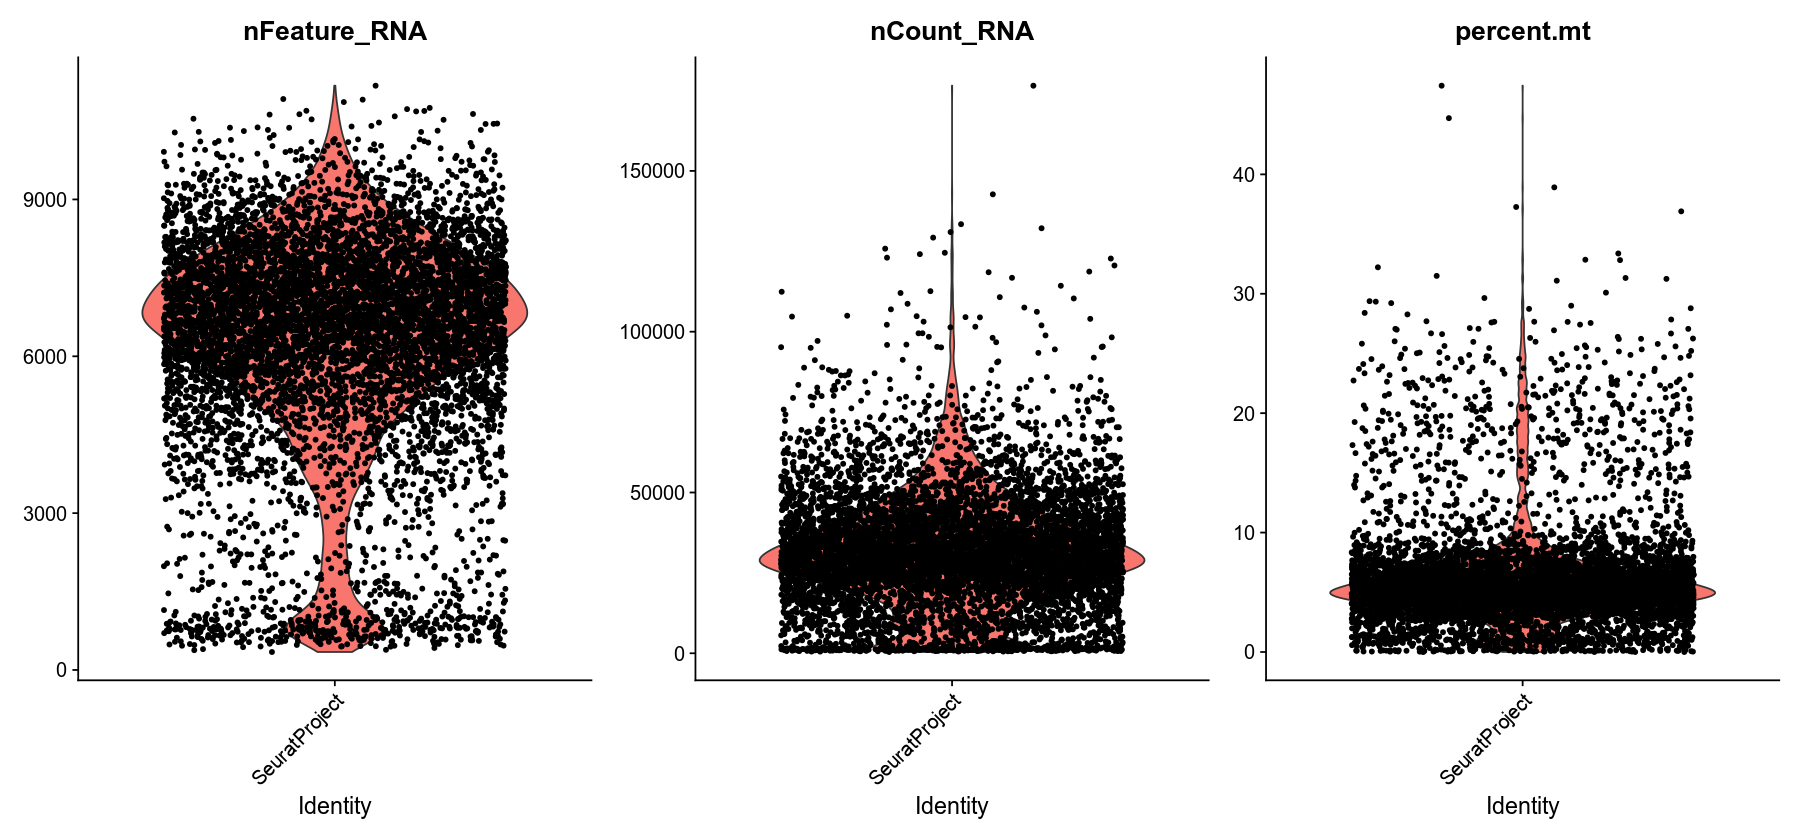

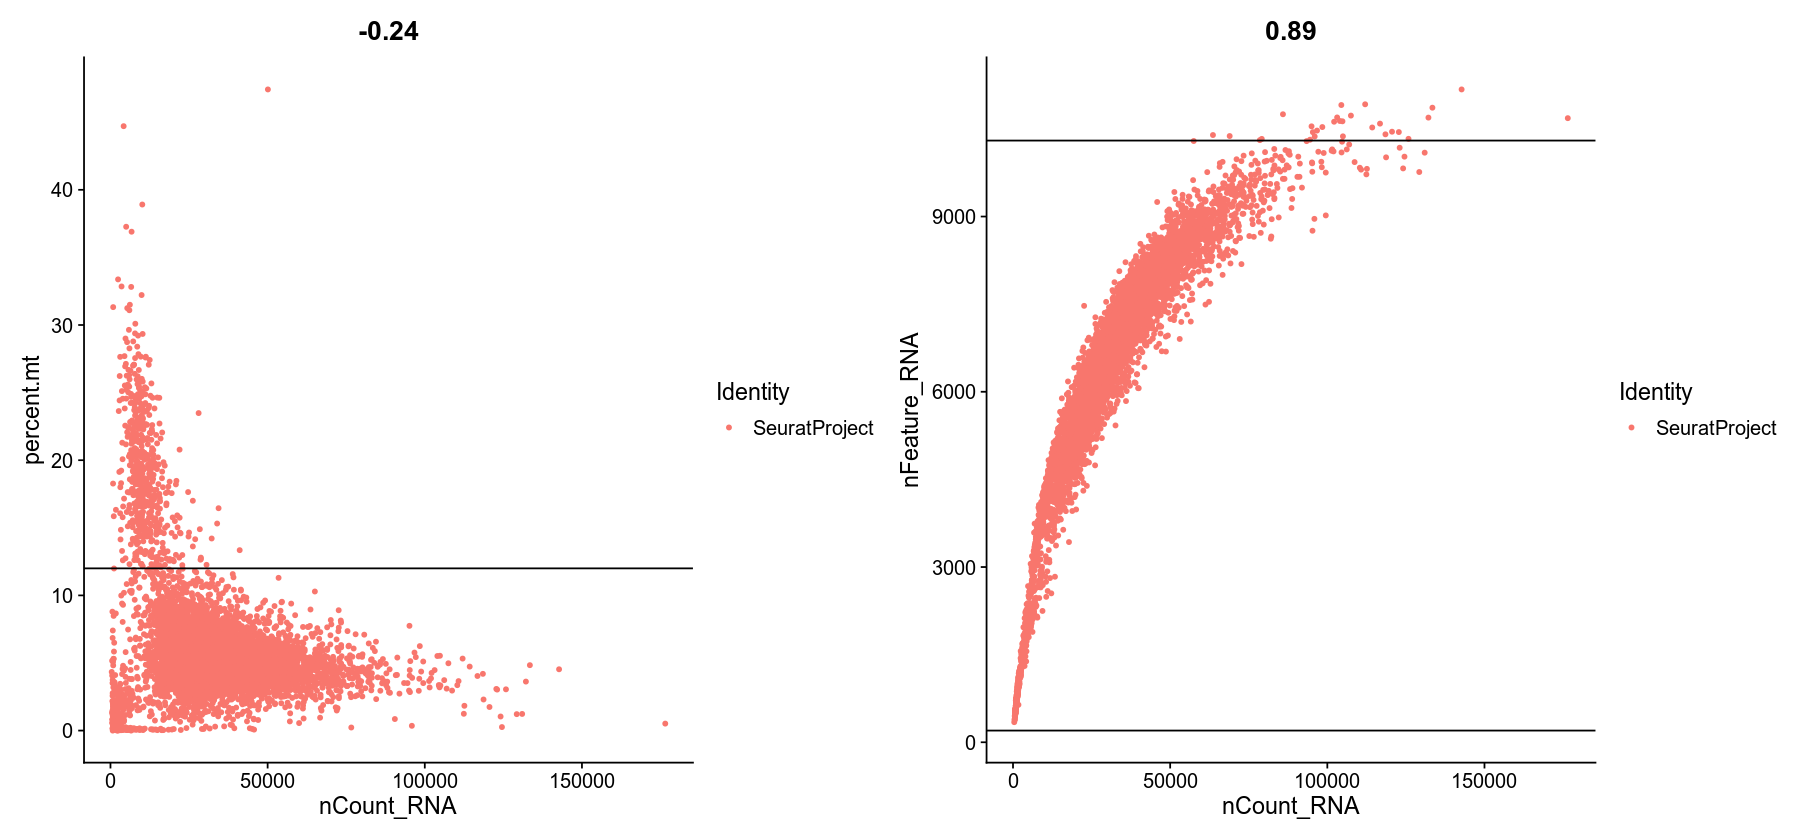

In [4]:
assignments_CRISPRi = read.csv('/home/ssobti/projects/heterogeneity_brian/output_data/CRISPRi_CRISPRa_cell_culture_screen/geomux_output_assignments_CRISPRi.csv')
CRISPRi_screen = Read10X_h5('/home/ssobti/projects/heterogeneity_brian/data/032923_MD231_CRISPRi_CRISPRa_screen/230329_A01102_0587_AH3CY5DSX7_S4_200/cellranger/combined_G12/outs/count/filtered_feature_bc_matrix.h5')
CRISPRi_seurat = CreateSeuratObject(CRISPRi_screen[['Gene Expression']])
CRISPRi_seurat = CRISPRi_seurat[,assignments_CRISPRi$barcode]
CRISPRi_seurat@meta.data = cbind(CRISPRi_seurat@meta.data, select(assignments_CRISPRi, -c('barcode', 'barcode.1')))
CRISPRi_guides_to_keep_and_analyze = read.csv('/home/ssobti/projects/heterogeneity_brian/output_data/CRISPRi_CRISPRa_cell_culture_screen/CRISPRi_guides_to_keep_and_analyze.csv')

options(repr.plot.width=15, repr.plot.height=7)
CRISPRi_seurat[["percent.mt"]] <- PercentageFeatureSet(CRISPRi_seurat, pattern = "^MT-")
VlnPlot(CRISPRi_seurat, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
plot1 <- FeatureScatter(CRISPRi_seurat, feature1 = "nCount_RNA", feature2 = "percent.mt") + geom_hline(yintercept = 12)
plot2 <- FeatureScatter(CRISPRi_seurat, feature1 = "nCount_RNA", feature2 = "nFeature_RNA") + geom_hline(yintercept = 200) + geom_hline(yintercept = 10300)
plot1 + plot2

Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
“'giveCsparse' has been deprecated; setting 'repr = "T"' for you”
Genome matrix has multiple modalities, returning a list of matrices for this genome



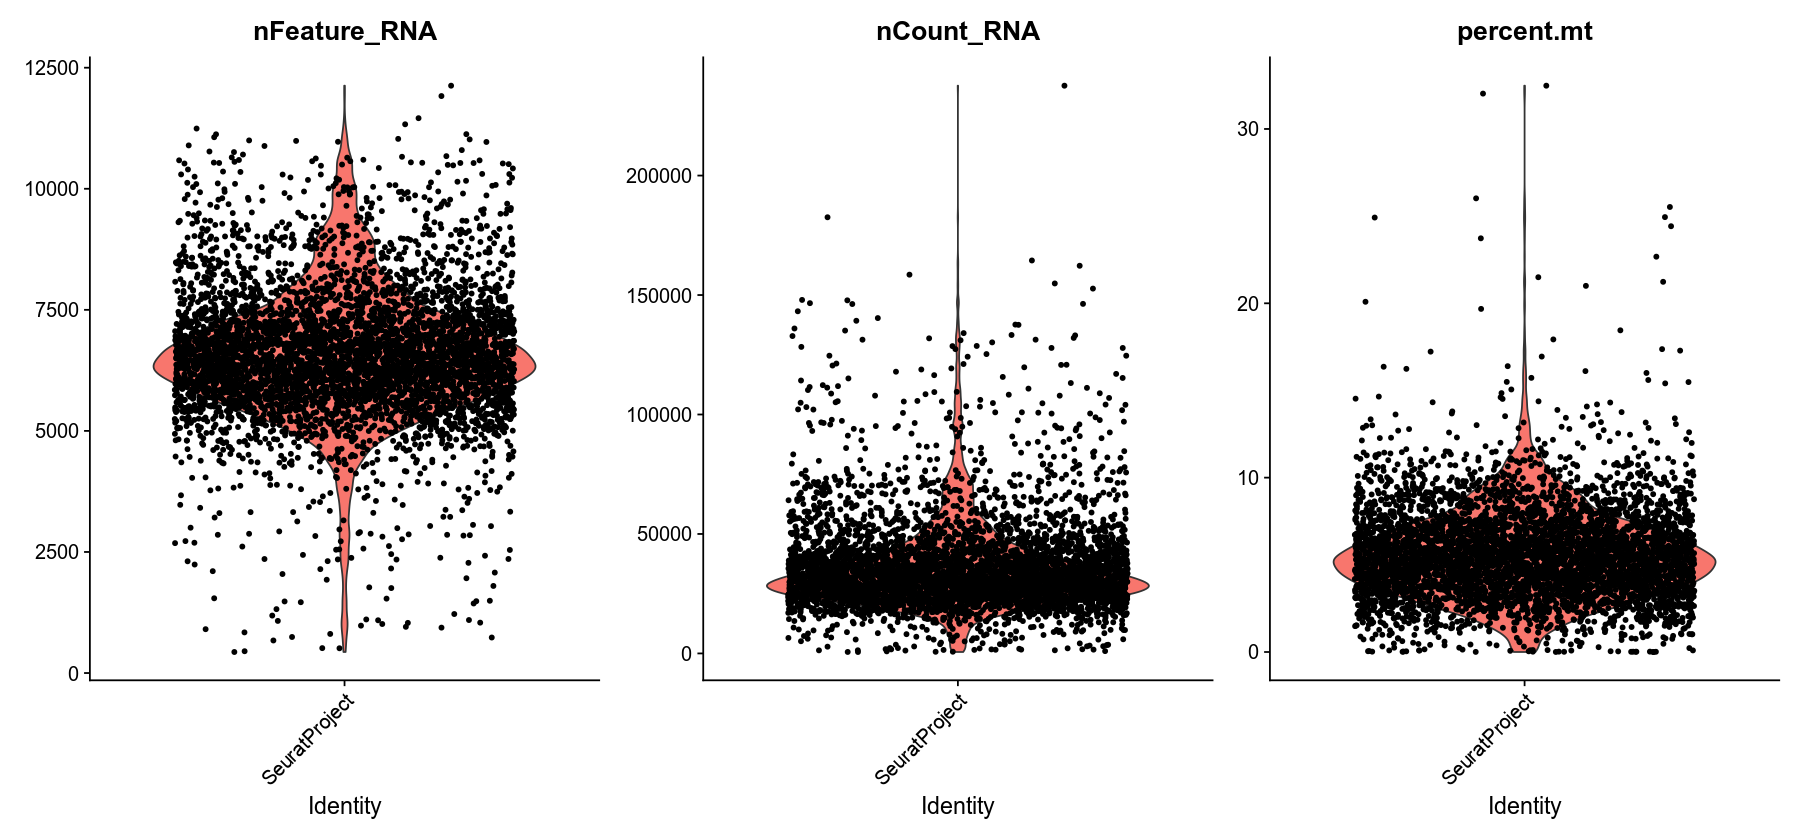

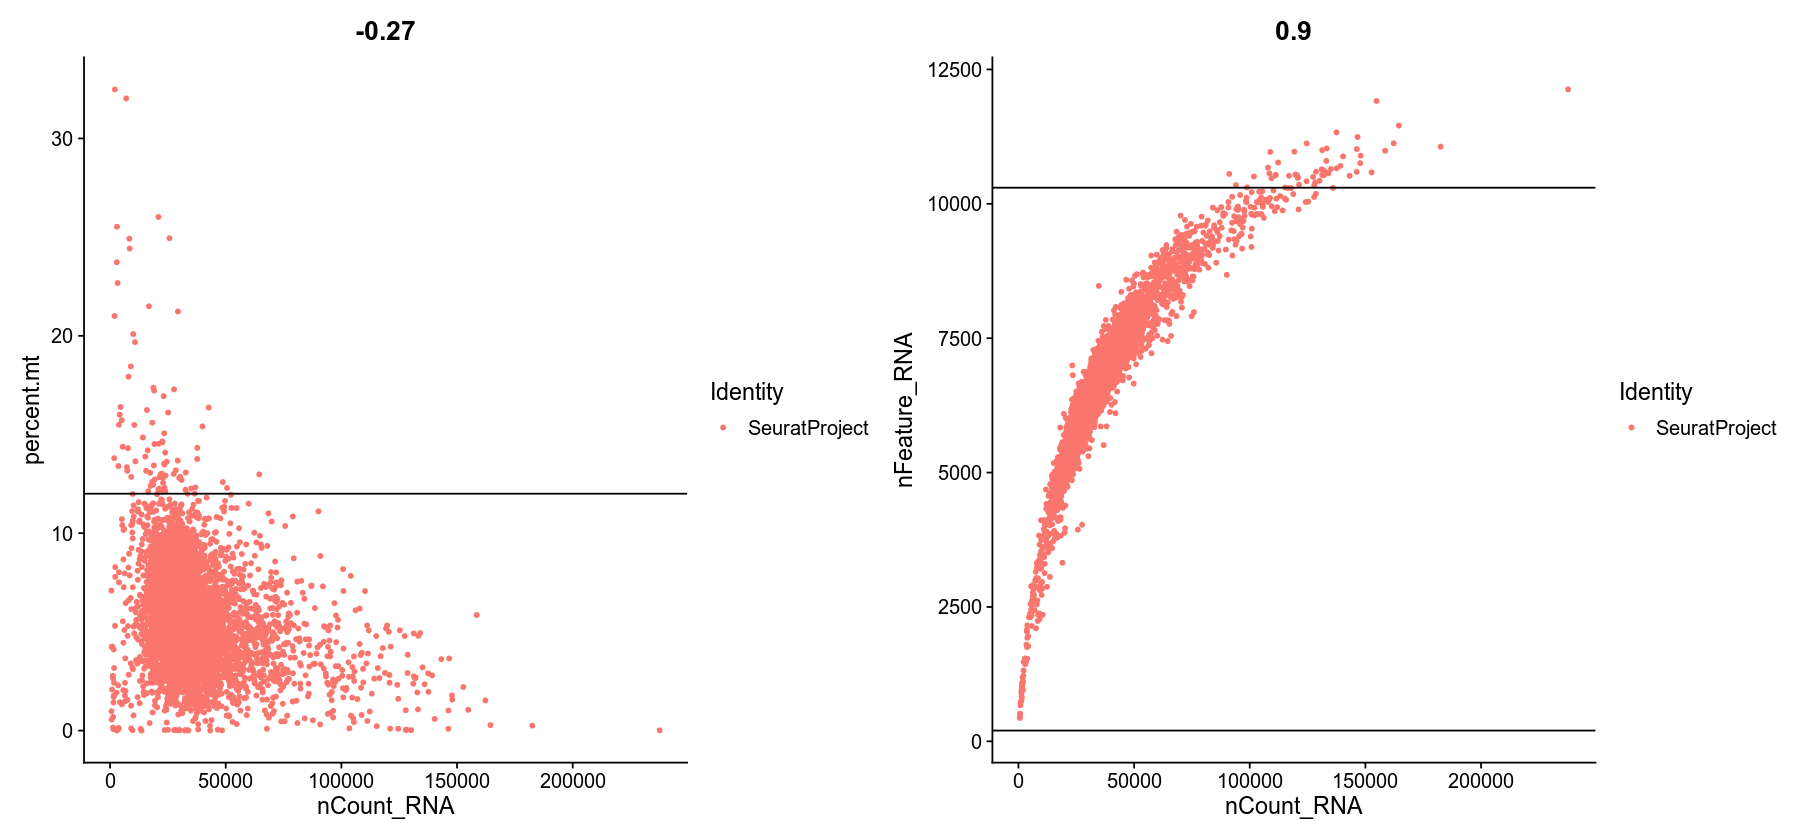

In [5]:
assignments_CRISPRa = read.csv('/home/ssobti/projects/heterogeneity_brian/output_data/CRISPRa_second_repeat_screen_deep_sequenced/geomux_output_assignments_CRISPRa.csv')
CRISPRa_screen = Read10X_h5('/home/ssobti/projects/heterogeneity_brian/data/121823_MD231_CRISPRa_second_repeat_screen_deep_sequenced/cellranger/combined_G12_CRISPRa/outs/count/filtered_feature_bc_matrix.h5')
CRISPRa_seurat = CreateSeuratObject(CRISPRa_screen[['Gene Expression']])
CRISPRa_seurat = CRISPRa_seurat[,assignments_CRISPRa$barcode]
CRISPRa_seurat@meta.data = cbind(CRISPRa_seurat@meta.data, select(assignments_CRISPRa, -c('barcode', 'barcode.1')))
CRISPRa_guides_to_keep_and_analyze = read.csv('/home/ssobti/projects/heterogeneity_brian/output_data/CRISPRa_second_repeat_screen_deep_sequenced/CRISPRa_guides_to_keep_and_analyze.csv')

options(repr.plot.width=15, repr.plot.height=7)
CRISPRa_seurat[["percent.mt"]] <- PercentageFeatureSet(CRISPRa_seurat, pattern = "^MT-")
VlnPlot(CRISPRa_seurat, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
plot1 <- FeatureScatter(CRISPRa_seurat, feature1 = "nCount_RNA", feature2 = "percent.mt") + geom_hline(yintercept = 12)
plot2 <- FeatureScatter(CRISPRa_seurat, feature1 = "nCount_RNA", feature2 = "nFeature_RNA") + geom_hline(yintercept = 200) + geom_hline(yintercept = 10300)
plot1 + plot2

In [6]:
s.genes <- cc.genes$s.genes
g2m.genes <- cc.genes$g2m.genes
CRISPRi_seurat_with_cc_scores <- CellCycleScoring(CRISPRi_seurat, s.features = s.genes, g2m.features = g2m.genes, set.ident = TRUE)
CRISPRa_seurat_with_cc_scores <- CellCycleScoring(CRISPRa_seurat, s.features = s.genes, g2m.features = g2m.genes, set.ident = TRUE)

Warning message:
“The following features are not present in the object: MLF1IP, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: FAM64A, HN1, not searching for symbol synonyms”


Warning message:
“The following features are not present in the object: MLF1IP, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: FAM64A, HN1, not searching for symbol synonyms”


In [7]:
meta = CRISPRi_seurat@meta.data
meta$condition = ifelse(startsWith(as.character(meta$guide), "NT-"), 'Control', 'Knockdown')
CRISPRi_seurat@meta.data = meta

meta = CRISPRa_seurat@meta.data
meta$condition = ifelse(startsWith(as.character(meta$guide), "NT-"), 'Control', 'Upregulation')
CRISPRa_seurat@meta.data = meta

In [8]:
CRISPRi_seurat <- NormalizeData(CRISPRi_seurat)
CRISPRi_seurat <- ScaleData(CRISPRi_seurat)


CRISPRa_seurat <- NormalizeData(CRISPRa_seurat)
CRISPRa_seurat <- ScaleData(CRISPRa_seurat)

Centering and scaling data matrix

Centering and scaling data matrix



### Analysis -- CRISPRi ###

In [30]:
### TWIST downstream targets
## EMT markers: normally TWIST represses E-cadherin (CDH1) and upregulates Slug (SNAI2) and Snail (SNAI1)
## Twist1 can activate txn by recruiting BRD4/pTEFb/RNA polymerase II complex to target promoters like that of Wnt5a
## Twist represses E-cadherin (CDH1) and upregulates mesenchymal markers such as N-cadherin (CDH2), fibronectin (FN1), vimentin, smooth-muscle actin, and MMPs
## PDGFRα, YB1 (YBX1), N-cadherin (CDH2), CD24, p53 (TP53), ARF (CDKN2A), and p21 (CDKN1A). 
## TWIST suppresses p27 (CDKN1B)
## TWIST upregulates VEGFA
## MDR1 (ABCB1)
## Bmi1***
## Akt

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 25)
genes_to_plot = c('TWIST1', 'TWIST2', 'CDH1', 'SNAI1', 'SNAI2', 'CDH2', 'VIM', 'FN1', 'VEGFA', 'MMP2', 'MMP9', 'BCL2L1', 'BCL2L11', 'BCL2A1', 'PDGFRA', 'YBX1', 'CD24', 'TP53', 'CDKN2A', 'CDKN1A', 'CDKN1B', 'ABCB1', 'BMI1', 'AKT1', 'AKT2', 'AKT3')

plots = list()
for (gene in genes_to_plot) {
    plots[[gene]] = VlnPlot(CRISPRi_seurat, features = gene, group.by = 'condition', assay = 'RNA', slot ='counts', ) +
        stat_summary(fun = mean, geom = 'point', size = 3, colour = "blue") 
}



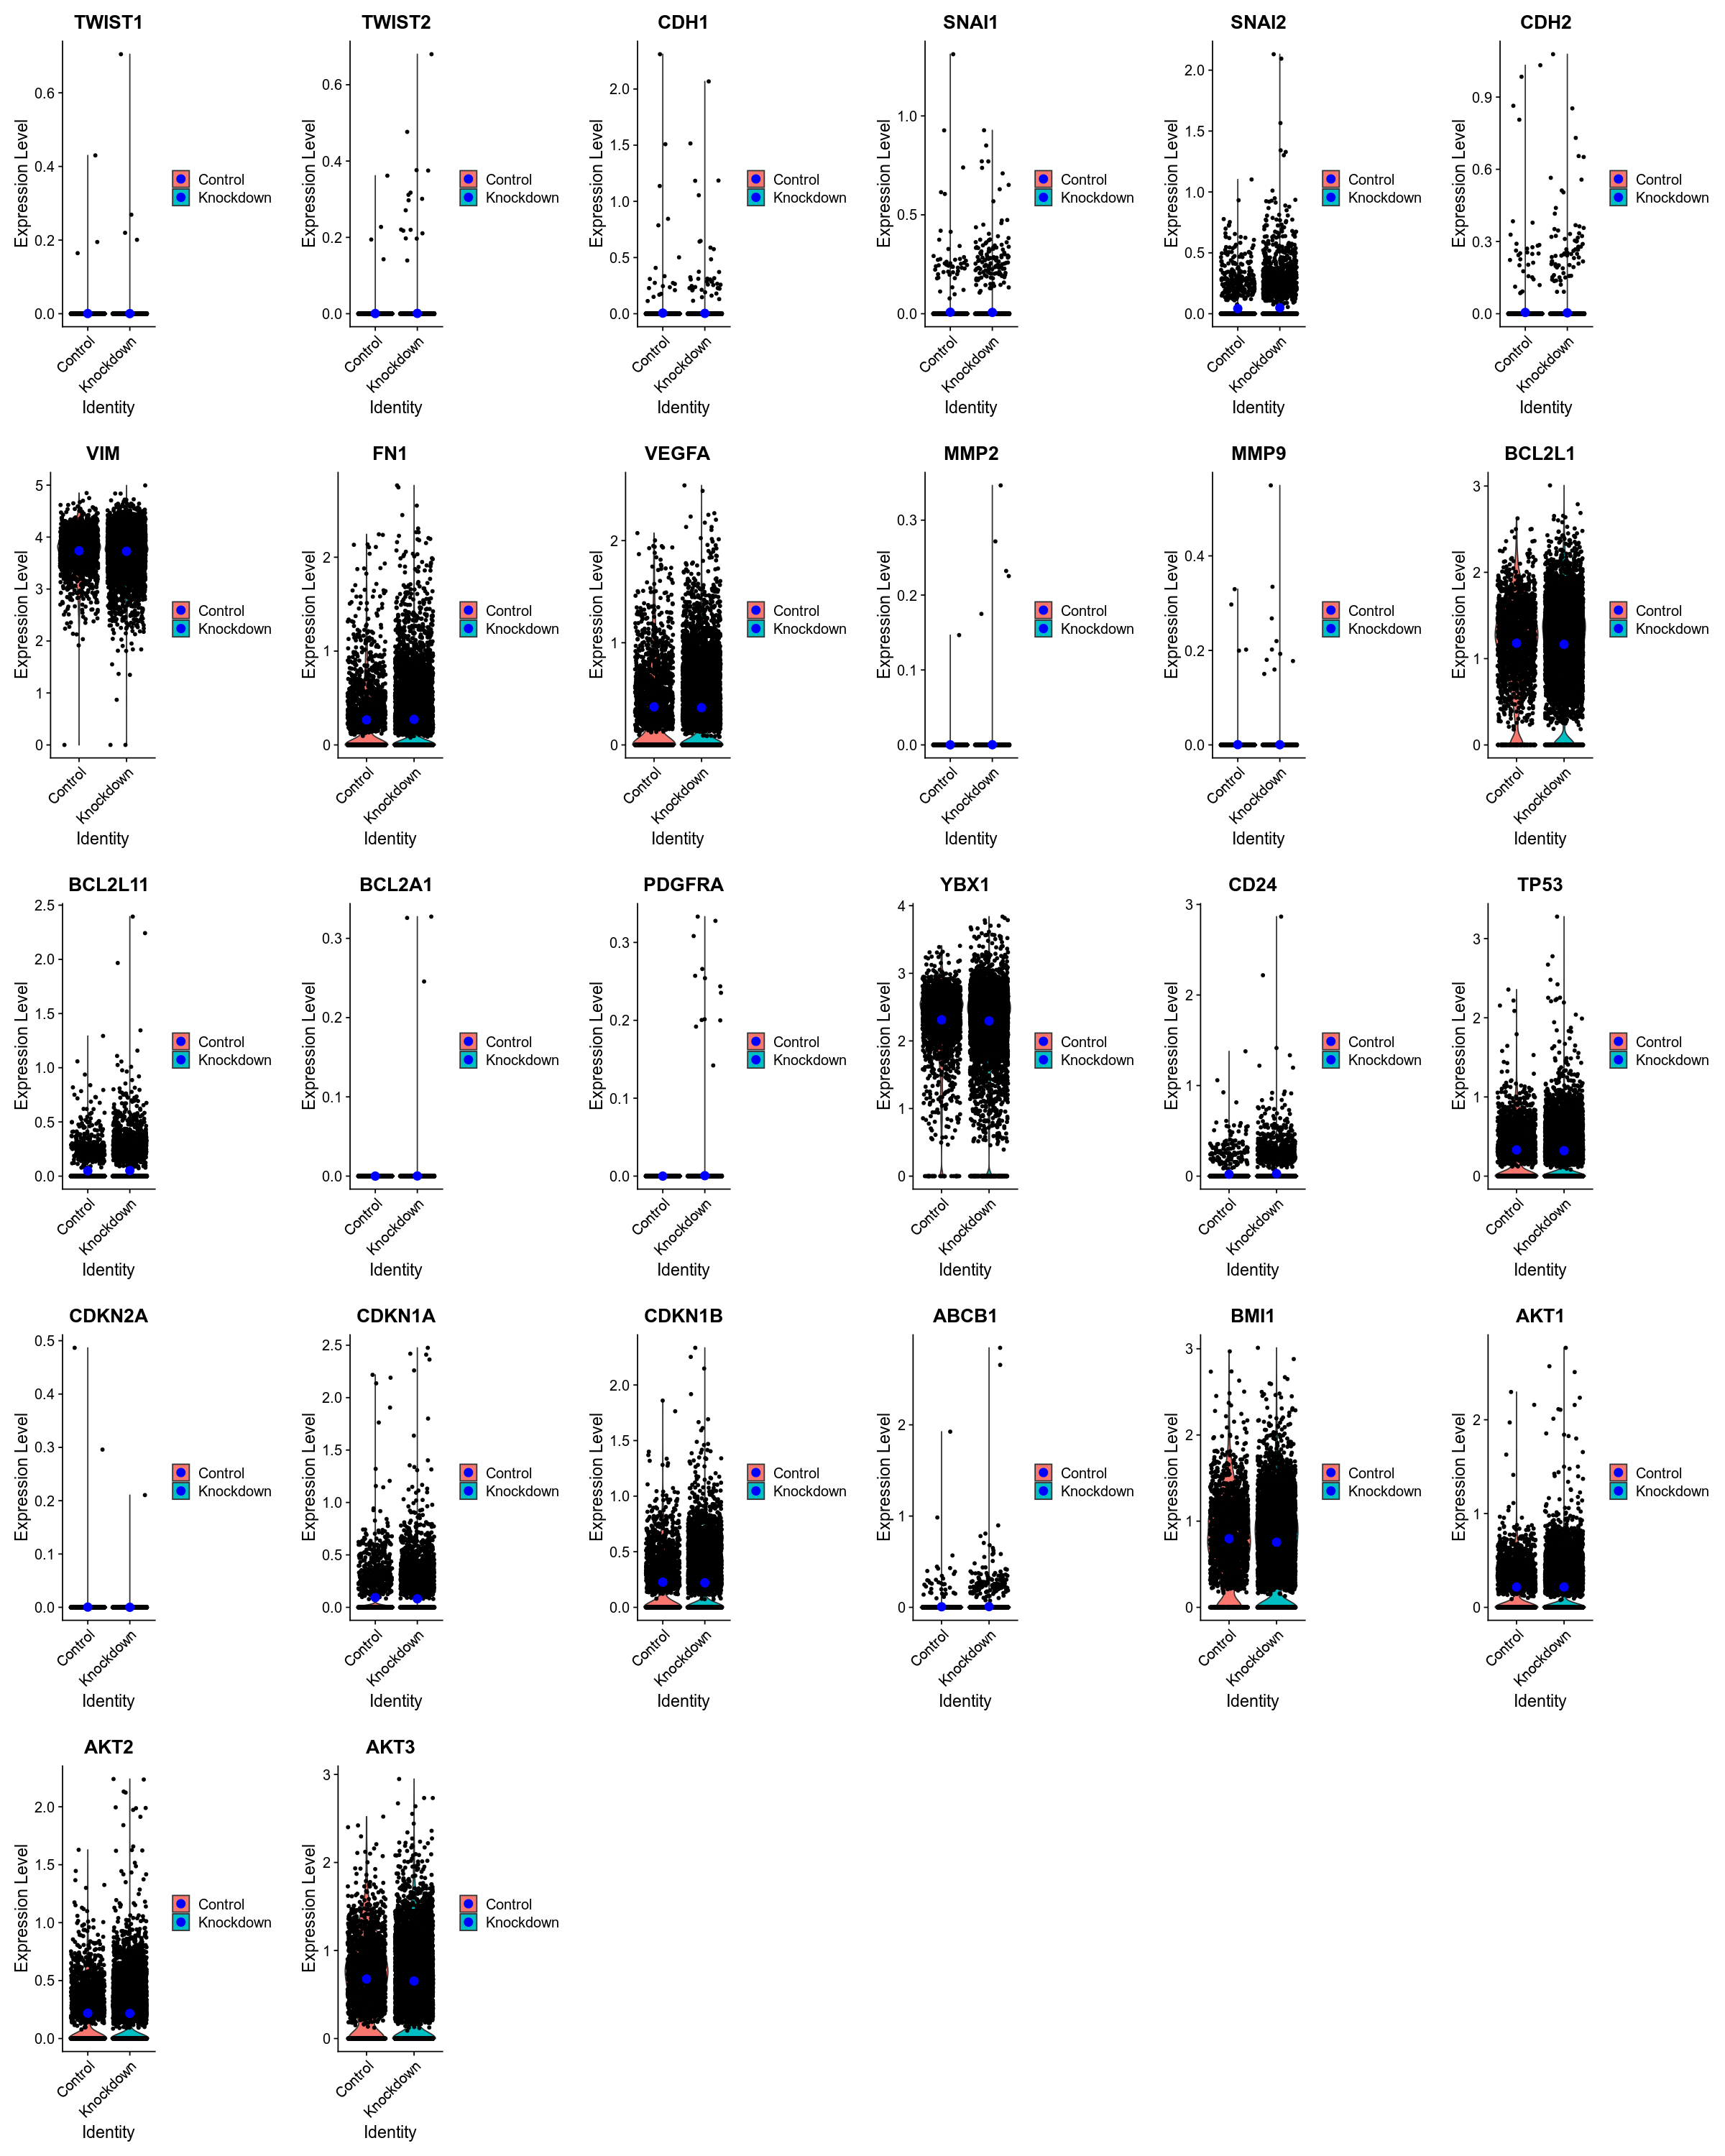

In [12]:
options(repr.plot.width = 20, repr.plot.height = 25)
ggarrange(plotlist = plots)

### Analysis -- CRISPRa ###

In [14]:
options(repr.plot.width = 10, repr.plot.height = 25)
genes_to_plot = c('TWIST1', 'TWIST2', 'CDH1', 'SNAI1', 'SNAI2', 'CDH2', 'VIM', 'FN1', 'VEGFA', 'MMP2', 'MMP9', 'BCL2L1', 'BCL2L11', 'BCL2A1', 'PDGFRA', 'YBX1', 'CD24', 'TP53', 'CDKN2A', 'CDKN1A', 'CDKN1B', 'ABCB1', 'BMI1', 'AKT1', 'AKT2', 'AKT3')

plots = list()
for (gene in genes_to_plot) {
    plots[[gene]] = VlnPlot(CRISPRa_seurat, features = gene, group.by = 'condition', assay = 'RNA') +
        stat_summary(fun = mean, geom = 'point', size = 3, colour = "blue") 
}

Warning message in SingleExIPlot(type = type, data = data[, x, drop = FALSE], idents = idents, :
“All cells have the same value of CDKN2A.”


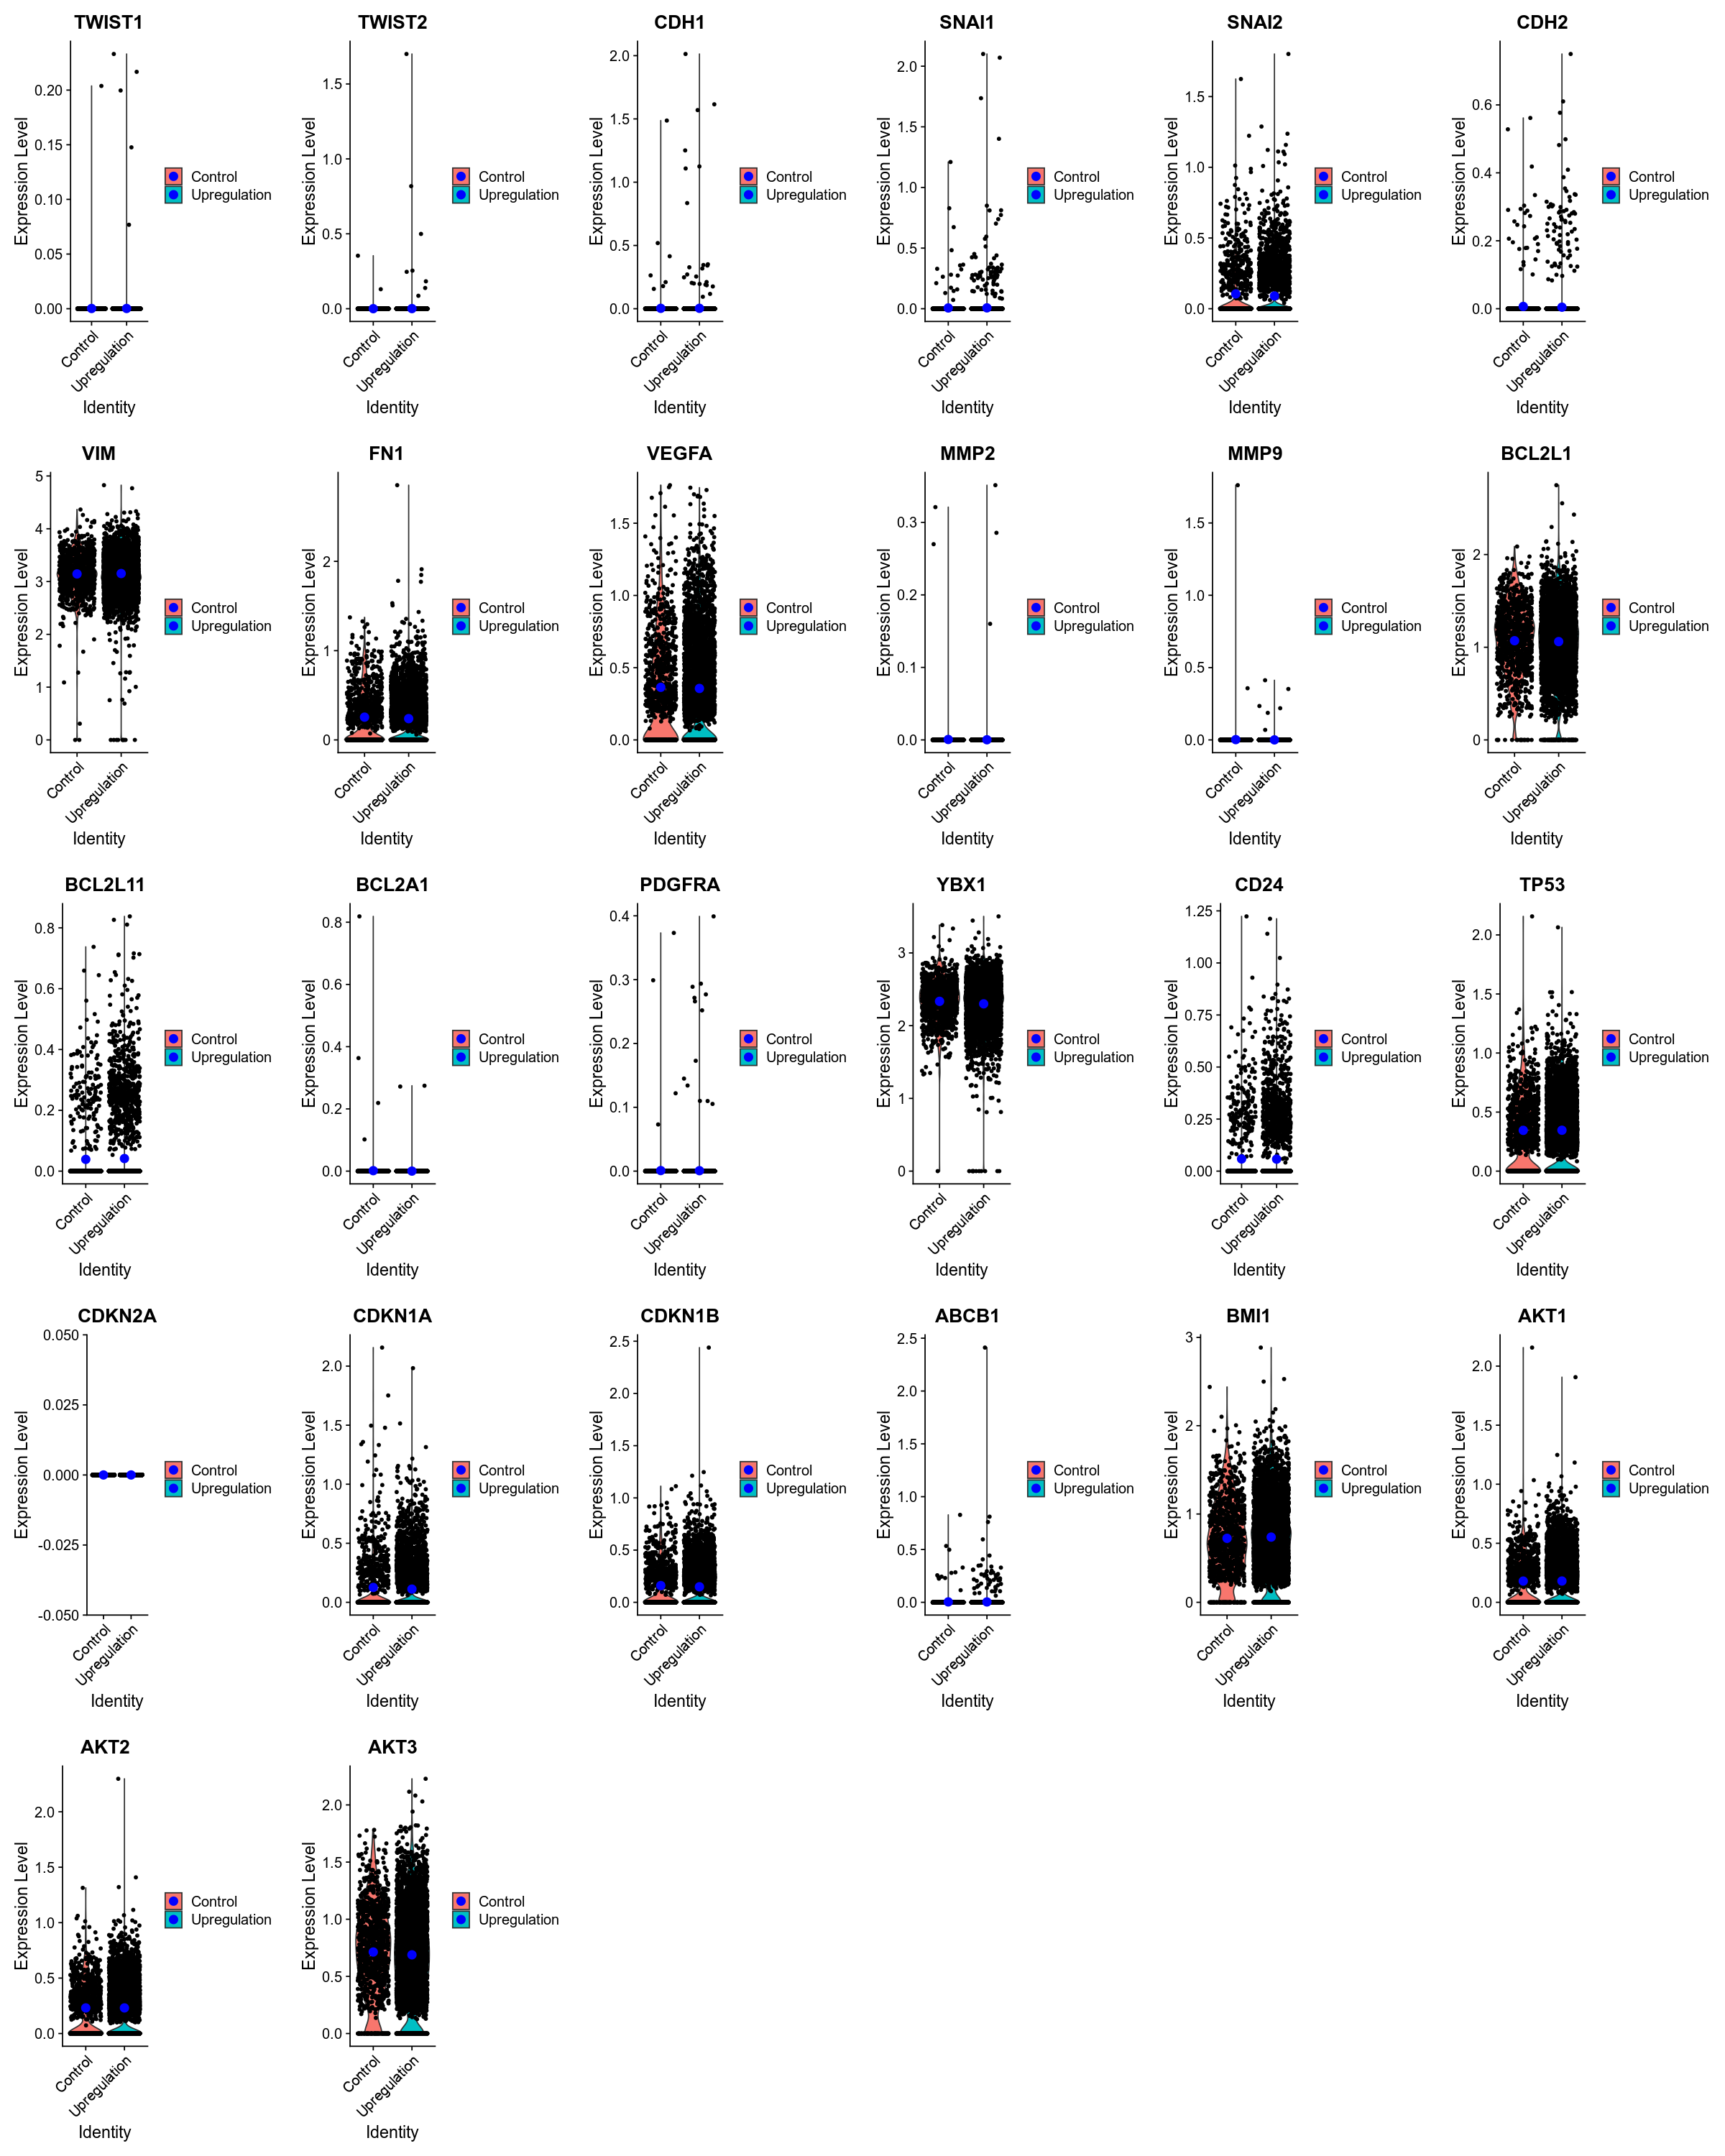

In [15]:
options(repr.plot.width = 20, repr.plot.height = 25)
ggarrange(plotlist = plots)